<a href="https://colab.research.google.com/github/Nazzy147/CNN-Based-Medical-Image-Analytics-for-MRI/blob/main/CNN_Based_Medical_Image_Analytics_for_MRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ============================================
# STEP 1: Mount Google Drive
# ============================================

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# ============================================
# STEP 2: Import Libraries
# ============================================

import tensorflow as tf
from tensorflow.keras import layers, models

import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


In [ ]:
# ============================================
# STEP 3: Load MRI Images (Unlabeled Dataset)
# ============================================

DATA_DIR = "/content/drive/MyDrive/mri"   # Folder with MRI images
IMG_SIZE = 128                            # Resize for CNN efficiency

images = []

for file in os.listdir(DATA_DIR):
    if file.lower().endswith((".jpg", ".jpeg", ".png")):
        path = os.path.join(DATA_DIR, file)

        img = cv2.imread(path)
        if img is None:
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        images.append(img)

# Convert to NumPy array and normalize
images = np.array(images, dtype="float32") / 255.0

print("Total MRI images loaded:", images.shape)


Total MRI images loaded: (690, 128, 128, 3)


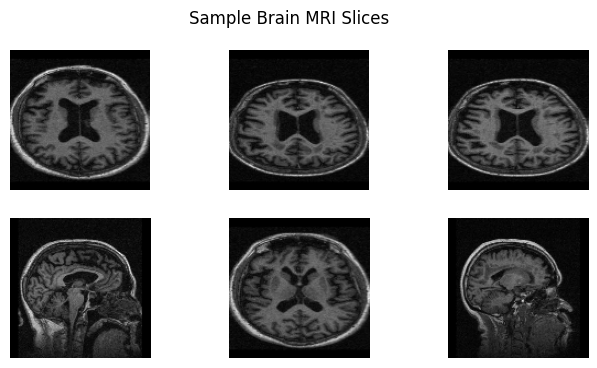

In [ ]:
# ============================================
# STEP 4: Visual Inspection of MRI Slices
# ============================================

plt.figure(figsize=(8,4))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i])
    plt.axis("off")
plt.suptitle("Sample Brain MRI Slices")
plt.show()


In [ ]:
# ============================================
# STEP 5: Train-Test Split
# ============================================

x_train, x_test = train_test_split(
    images,
    test_size=0.2,
    random_state=42
)

print("Training set:", x_train.shape)
print("Testing set :", x_test.shape)


Training set: (552, 128, 128, 3)
Testing set : (138, 128, 128, 3)


In [ ]:
# ============================================
# STEP 6: CNN Autoencoder Architecture
# ============================================

# Encoder: compresses MRI into latent representation
encoder = models.Sequential([
    layers.Conv2D(32, 3, activation='relu', padding='same',
                  input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D(2),

    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(2),

    layers.Conv2D(128, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(2)
])

# Decoder: reconstructs MRI from learned features
decoder = models.Sequential([
    layers.Conv2DTranspose(128, 3, strides=2, activation='relu', padding='same'),
    layers.Conv2DTranspose(64, 3, strides=2, activation='relu', padding='same'),
    layers.Conv2DTranspose(32, 3, strides=2, activation='relu', padding='same'),
    layers.Conv2D(3, 3, activation='sigmoid', padding='same')
])

autoencoder = models.Sequential([encoder, decoder])
autoencoder.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 16, 16, 128)    │        93,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 128, 128, 3)    │       240,707 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,955 (1.27 MB)

 Trainable params: 333,955 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ============================================
# STEP 7: Compile & Train Autoencoder
# ============================================

autoencoder.compile(
    optimizer='adam',
    loss='mse'   # Reconstruction loss
)

history = autoencoder.fit(
    x_train, x_train,
    epochs=30,
    batch_size=16,
    validation_data=(x_test, x_test)
)


Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - loss: 0.0985 - val_loss: 0.0509
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - loss: 0.0511 - val_loss: 0.0509
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - loss: 0.0502 - val_loss: 0.0509
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - loss: 0.0492 - val_loss: 0.0509
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - loss: 0.0501 - val_loss: 0.0509
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - loss: 0.0495 - val_loss: 0.0509
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - loss: 0.0497 - val_loss: 0.0509
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - loss: 0.0497 - val_loss: 0.0509
Epoch 9/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - loss: 0.0501 - val_loss: 0.0509
Epoch 10/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - loss: 0.0503 - val_loss: 0.0509
Epoch 11/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - loss: 0.0506 - val_loss: 0.0509
Epoch 12/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - loss: 0.0500 - val_lo

In [ ]:
# ============================================
# STEP 8: Reconstruction Error Calculation
# ============================================

reconstructed = autoencoder.predict(x_test)

reconstruction_errors = np.mean(
    np.square(x_test - reconstructed),
    axis=(1,2,3)
)

# Threshold: top 5% most abnormal samples
threshold = np.percentile(reconstruction_errors, 95)

print("Anomaly threshold:", threshold)


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 661ms/step
Anomaly threshold: 0.071293265


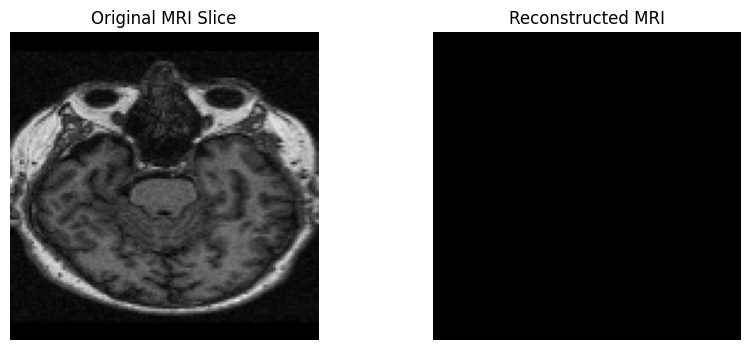

Reconstruction Error: 0.08288799


In [ ]:
# ============================================
# STEP 9: Visualize Anomalous MRI Slice
# ============================================

idx = np.argmax(reconstruction_errors)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(x_test[idx])
plt.title("Original MRI Slice")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(reconstructed[idx])
plt.title("Reconstructed MRI")
plt.axis("off")

plt.show()

print("Reconstruction Error:", reconstruction_errors[idx])


In [ ]:
# ============================================
# STEP 10: Confidence Monitoring
# ============================================

def anomaly_confidence(error, threshold):
    """
    Confidence is proportional to how far the error
    exceeds the learned normal threshold.
    """
    return min(error / threshold, 1.0)

confidence = anomaly_confidence(
    reconstruction_errors[idx],
    threshold
)

print("Anomaly Confidence:", confidence)


Anomaly Confidence: 1.0


In [ ]:
# ============================================
# STEP 11: Data Drift Simulation
# ============================================

def simulate_drift(images):
    noise = np.random.normal(0, 0.15, images.shape)
    return np.clip(images + noise, 0, 1)

x_drifted = simulate_drift(x_test)

recon_drift = autoencoder.predict(x_drifted)
drift_errors = np.mean(
    np.square(x_drifted - recon_drift),
    axis=(1,2,3)
)

print("Mean Error (Normal Data):", np.mean(reconstruction_errors))
print("Mean Error (Drifted Data):", np.mean(drift_errors))


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 749ms/step
Mean Error (Normal Data): 0.050916467
Mean Error (Drifted Data): 0.06924413925268909


In [ ]:
# ============================================
# STEP 12: Reliable Medical Screening
# ============================================

def reliable_mri_screening(image):
    """
    Final inference logic with safety check.
    """
    recon = autoencoder.predict(image[np.newaxis, ...])
    error = np.mean((image - recon[0]) ** 2)

    if error > threshold:
        return "⚠️ Possible Abnormality – Doctor Review Required", error
    else:
        return "✅ Likely Normal MRI", error

result, err = reliable_mri_screening(x_test[5])
print(result)
print("Reconstruction Error:", err)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
✅ Likely Normal MRI
Reconstruction Error: 0.036469817
